In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split as tts
import cv2
# from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# import pickle
# import joblib
# import os

In [34]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [35]:
x_train, x_val, y_train, y_val = tts(x_train,y_train,test_size=0.15)

In [36]:
len(x_train), len(x_val), len(x_test)

(51000, 9000, 10000)

In [37]:
len(y_train), len(y_val), len(y_test)

(51000, 9000, 10000)

In [38]:
x_train.shape, x_val.shape, x_test.shape

((51000, 28, 28), (9000, 28, 28), (10000, 28, 28))

In [39]:
y_train.shape, y_val.shape, y_test.shape

((51000,), (9000,), (10000,))

In [40]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,  92, 193,
        152,  92,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 132, 252, 253,
        252, 253, 232,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62,  61,  21,
        102, 132, 253, 234,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<Figure size 432x288 with 0 Axes>

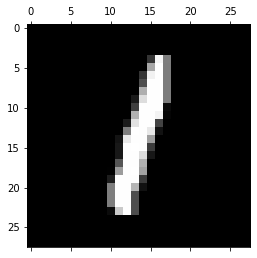

In [41]:
plt.gray()
plt.matshow(x_train[9])

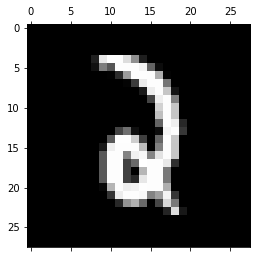

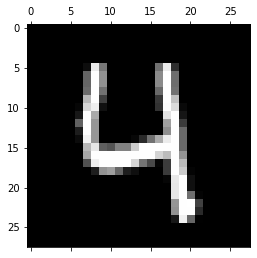

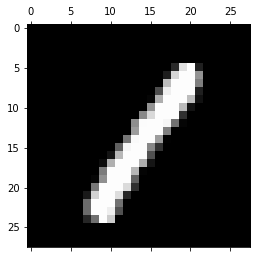

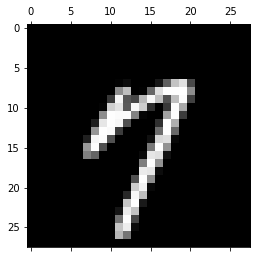

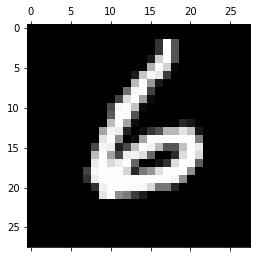

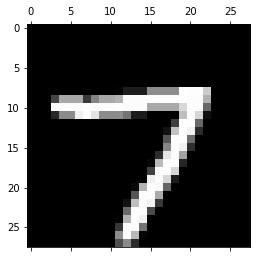

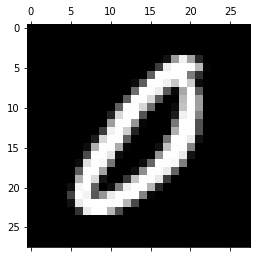

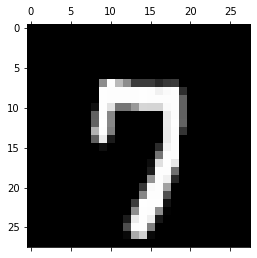

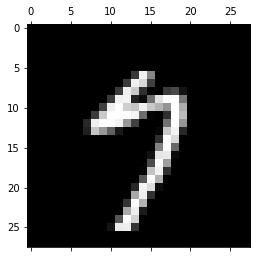

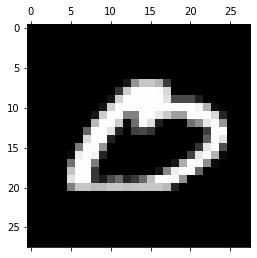

In [42]:
for i in range(100,110):
    plt.matshow(x_train[i])

In [43]:
y_train[:5]

array([3, 9, 1, 0, 1], dtype=uint8)

In [44]:
noOfClasses = 10
noOfSamples = [0,0,0,0,0,0,0,0,0,0]

for x in range(0,len(y_train)):
    noOfSamples[y_train[x]]+=1

for x in range(0, noOfClasses):
    print(f"no. of images having class = {x} is",noOfSamples[x])
print('\n',noOfSamples)

no. of images having class = 0 is 5045
no. of images having class = 1 is 5754
no. of images having class = 2 is 5060
no. of images having class = 3 is 5190
no. of images having class = 4 is 4941
no. of images having class = 5 is 4581
no. of images having class = 6 is 5051
no. of images having class = 7 is 5355
no. of images having class = 8 is 4966
no. of images having class = 9 is 5057

 [5045, 5754, 5060, 5190, 4941, 4581, 5051, 5355, 4966, 5057]


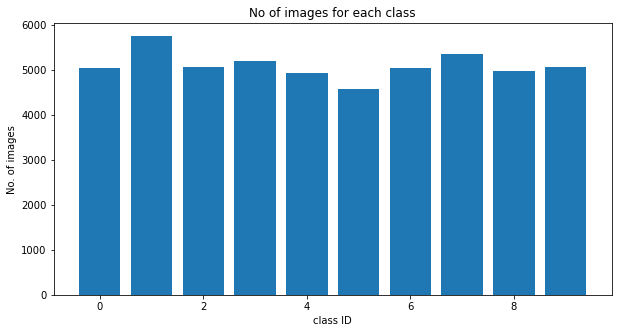

In [45]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses), noOfSamples)
plt.title("No of images for each class")
plt.xlabel("class ID")
plt.ylabel("No. of images")
plt.show()

In [46]:
def preProcessing(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
#     noise_factor = 0.1
#     img = img.astype('float32')
    img = img/255
#     img_noisy = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
#     img_noisy = np.clip(img_noisy, 0., 1.)
    return img

In [47]:
img = preProcessing(x_train[50])
img = cv2.resize(img,(300,300))
cv2.imshow("PreProcessed Image", img)
cv2.waitKey(0)

-1

noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [48]:
x_train = np.array(list(map(preProcessing,x_train)))
x_test = np.array(list(map(preProcessing,x_test)))
x_val = np.array(list(map(preProcessing,x_val)))

In [49]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [50]:
x_train.shape

(51000, 28, 28, 1)

dataGen = IDG(
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.2,
            shear_range=0.1,
            rotation_range=10,
#             brightness_range=[0.8,1.0],
)

dataGen.fit(x_train)

In [51]:
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_val = to_categorical(y_val,noOfClasses)

In [52]:
imageDimensions=[28,28,1]

In [53]:
# LENET Model
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500
    
    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1, input_shape=(imageDimensions[0],imageDimensions[1],imageDimensions[2]), activation='relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(noOfNode,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [54]:
model = myModel()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 60)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 30)          16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 30)          8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 30)         0         
 2D)                                                  

In [55]:
batchSizeVal = 50
epochsVal = 10
stepsPerEpochVal = 500

In [56]:
history = model.fit(x_train,y_train,
                   batch_size=batchSizeVal,
                   steps_per_epoch=stepsPerEpochVal,
                   epochs=epochsVal,
                   validation_data=(x_val,y_val),
                   shuffle=1)

Epoch 1/10
500/500 [==============================] - 12s 10ms/step - loss: 0.4506 - accuracy: 0.8519 - val_loss: 0.1093 - val_accuracy: 0.9668
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 0.1486 - accuracy: 0.9545 - val_loss: 0.0566 - val_accuracy: 0.9820
Epoch 3/10
500/500 [==============================] - 5s 10ms/step - loss: 0.1135 - accuracy: 0.9649 - val_loss: 0.0489 - val_accuracy: 0.9862
Epoch 4/10
500/500 [==============================] - 5s 10ms/step - loss: 0.0951 - accuracy: 0.9706 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 5/10
500/500 [==============================] - 5s 10ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 6/10
500/500 [==============================] - 5s 10ms/step - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 7/10
500/500 [==============================] - 5s 10ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.0352 - val_accuracy: 0.989

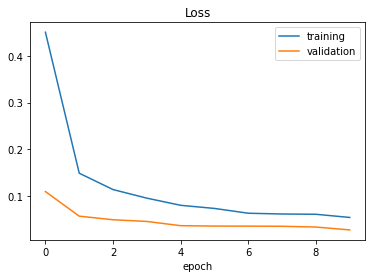

In [57]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

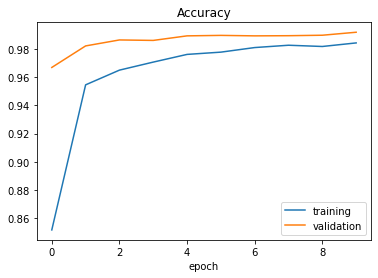

In [58]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [59]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test Score = ', score[0])
print('Test Accuracy = ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0234 - accuracy: 0.9925
Test Score =  0.023362863808870316
Test Accuracy =  0.9925000071525574


In [60]:
y_pred = model.predict(x_test)
y_pred[10]

array([9.99998808e-01, 1.40671337e-11, 7.74730182e-08, 8.76822503e-10,
       6.88634205e-10, 3.66735051e-08, 3.97812894e-09, 7.68596742e-09,
       1.25934205e-08, 1.05754759e-06], dtype=float32)

In [61]:
y_test_labels = [np.argmax(i) for i in y_test]
print("test labels : ",y_test_labels[100:110])
y_pred_labels = [np.argmax(i) for i in y_pred]
print("prediction labels : ",y_pred_labels[100:110])

test labels :  [6, 0, 5, 4, 9, 9, 2, 1, 9, 4]
prediction labels :  [6, 0, 5, 4, 9, 9, 2, 1, 9, 4]


In [62]:
cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    0,    3,    0,    0,    0,    2,    0,    0],
       [   1,    0, 1027,    1,    0,    0,    2,    1,    0,    0],
       [   0,    0,    0, 1009,    0,    1,    0,    0,    0,    0],
       [   0,    0,    1,    0,  973,    0,    0,    0,    1,    7],
       [   1,    0,    0,    9,    0,  878,    1,    1,    0,    2],
       [   4,    4,    0,    0,    2,    1,  946,    0,    1,    0],
       [   0,    3,    2,    2,    0,    0,    0, 1017,    0,    4],
       [   2,    0,    2,    1,    0,    0,    0,    0,  968,    1],
       [   2,    0,    0,    0,    4,    1,    0,    1,    2,  999]])>

Text(69.0, 0.5, 'Truth')

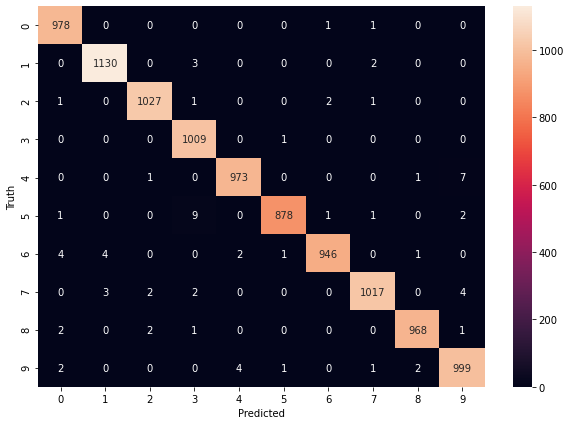

In [63]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
recall = np.diag(cm)/np.sum(cm, axis=1)
precision = np.diag(cm)/np.sum(cm, axis=0)
recall = np.mean(recall)
precision = np.mean(precision)
f1 = (2 * precision * recall)/(precision + recall)
print('recall = ',recall)
print('precision = ',precision)
print('f1 score = ',f1)

recall =  0.9923561348180436
precision =  0.9925722157814996
f1 score =  0.9924641635383943


In [65]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(y_test_labels,y_pred_labels))

0.0299


In [66]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test_labels,y_pred_labels))

0.1501


In [67]:
from sklearn.metrics import accuracy_score as As
print(As(y_test_labels,y_pred_labels))

0.9925


In [68]:
filepath = 'new_model'
tf.keras.models.save_model(
    model, filepath, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True
)

INFO:tensorflow:Assets written to: new_model\assets
